<a href="https://colab.research.google.com/github/Piece-kun/python-for-DPaV/blob/main/labs/%D0%9B%D0%A02_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D1%8B_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly` и `altair`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn`, второй – с помощью `plotly` или `altair` на выбор студента.

# Данные


В папке [Data/lab2](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

data_path = '/song_data.csv'
df = pd.read_csv(data_path)


## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [ ]:
num_cols = ['BPM','energy','danceability','happiness','acousticness','instrumentalness','liveness','speechiness','loudness']
for col in num_cols:
    df[col] = df[col].replace(['-', np.nan], 0)

df['loudness'] = df['loudness'].astype(str).str.replace(r'[^0-9.-]', '', regex=True)

for col in num_cols:
    df[col] = df[col].astype(float)

print("Задание 1: Предобработка завершена")
print(df[num_cols].head())


Задание 1: Предобработка завершена
     BPM  energy  danceability  happiness  acousticness  instrumentalness  \
0  110.0    36.0          64.0       23.0          58.0               0.0   
1  103.0    78.0          70.0       82.0           2.0               0.0   
2  103.0    70.0          56.0       11.0           4.0               2.0   
3  160.0    55.0          56.0       40.0           5.0               0.0   
4  145.0    63.0          66.0       77.0          31.0               0.0   

   liveness  speechiness  loudness  
0      10.0          3.0      10.0  
1      18.0          4.0       6.0  
2      32.0          5.0      10.0  
3       8.0          7.0       8.0  
4      16.0          5.0       8.0  


## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

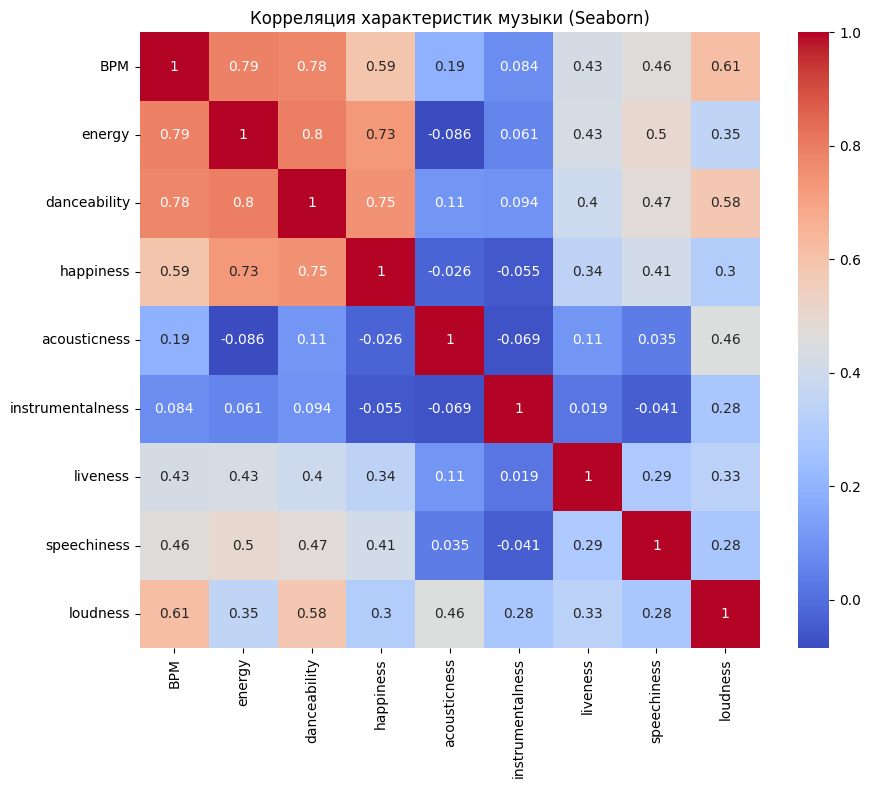

In [ ]:
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляция характеристик музыки (Seaborn)")
plt.show()

fig = px.imshow(corr, text_auto=True, aspect="auto",
                title="Корреляция характеристик музыки (Plotly)")
fig.show()


## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



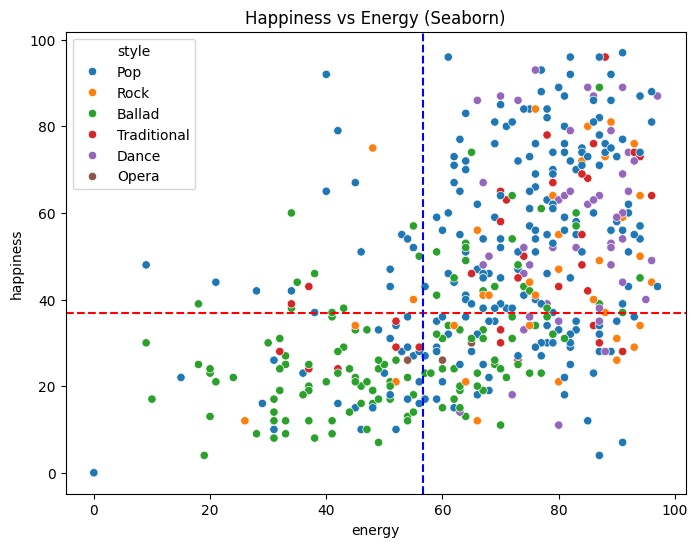

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='energy', y='happiness', hue='style')
plt.axhline(df['happiness'].mean(), color='red', linestyle='--')
plt.axvline(df['energy'].mean(), color='blue', linestyle='--')
plt.title("Happiness vs Energy (Seaborn)")
plt.show()

fig = px.scatter(df, x='energy', y='happiness', color='style',
                 title='Happiness vs Energy (Plotly)')
fig.add_hline(y=df['happiness'].mean(), line_dash='dash', line_color='red')
fig.add_vline(x=df['energy'].mean(), line_dash='dash', line_color='blue')
fig.show()

## Задание 4

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

/tmp/ipython-input-2805435294.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




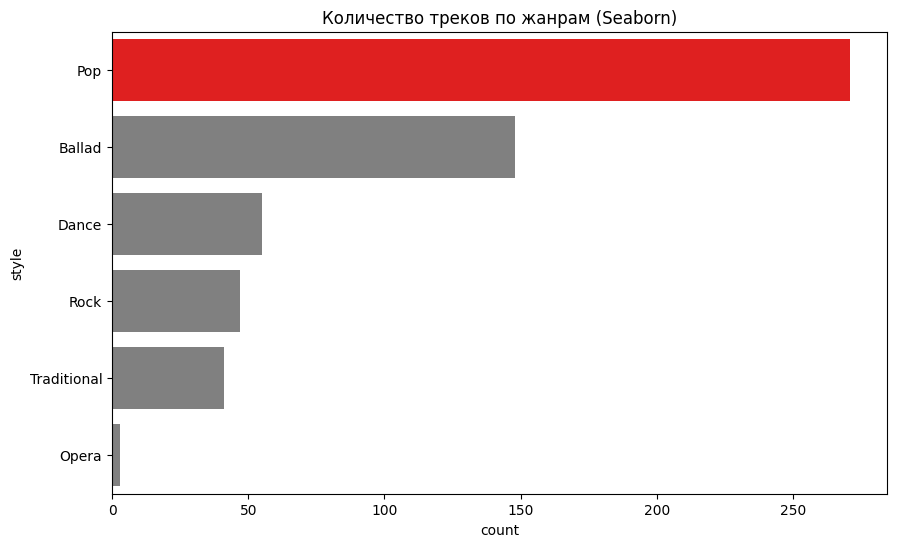

In [ ]:
genre_counts = df['style'].value_counts().reset_index()
genre_counts.columns = ['style', 'count']
top_genre = genre_counts.iloc[0]['style']

plt.figure(figsize=(10,6))
sns.barplot(y='style', x='count', data=genre_counts,
            palette=[ 'red' if x==top_genre else 'gray' for x in genre_counts['style']])
plt.title("Количество треков по жанрам (Seaborn)")
plt.show()

sorted_genres = genre_counts.sort_values('count', ascending=True).copy()
sorted_genres['is_top'] = sorted_genres['style'] == top_genre

fig = px.bar(sorted_genres,
             y='style', x='count',
             color='is_top',
             color_discrete_map={True:'red', False:'gray'})
fig.show()

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

In [ ]:
winners = df[df['final_place']==1].groupby('country').size().reset_index(name='wins')


fig = px.pie(winners, values='wins', names='country', title='Победы по странам (Plotly)')
fig.show()


## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

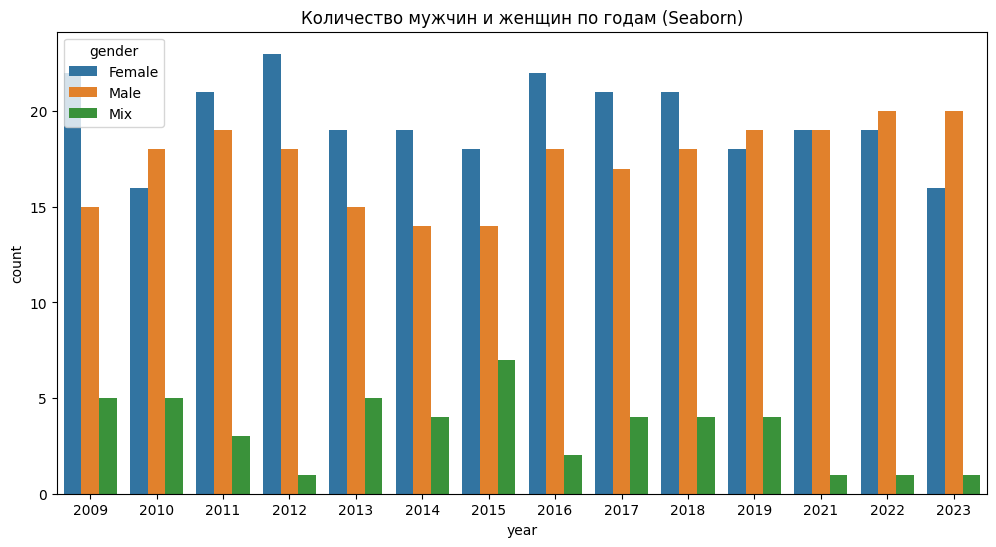

In [ ]:
gender_counts = df.groupby(['year','gender']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=gender_counts, x='year', y='count', hue='gender')
plt.title("Количество мужчин и женщин по годам (Seaborn)")
plt.show()

fig = px.bar(gender_counts, x='year', y='count', color='gender', barmode='group',
             title='Количество мужчин и женщин по годам (Plotly)')
fig.show()


## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

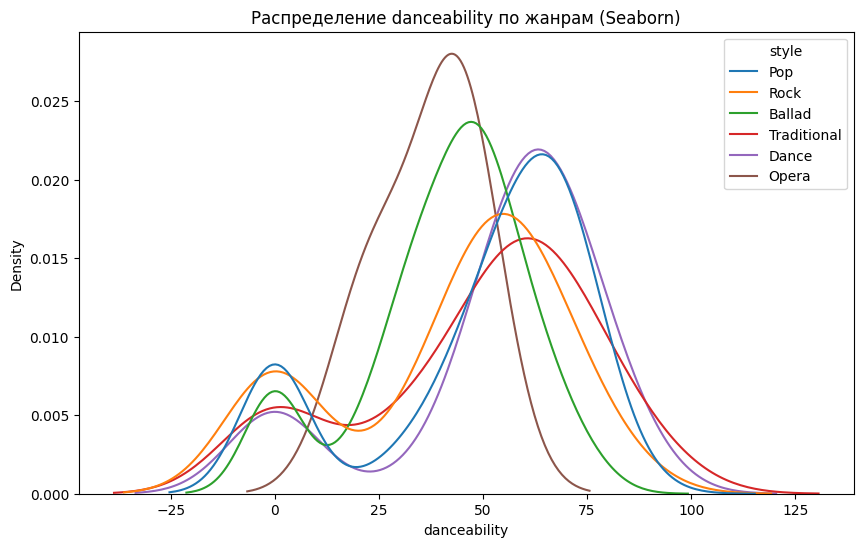

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='danceability', hue='style', common_norm=False)
plt.title("Распределение danceability по жанрам (Seaborn)")
plt.show()

fig = px.histogram(
    df,
    x='danceability',
    color='style',
    histnorm='probability density',
    barmode='overlay'
)

fig.update_layout(
    title='Распределение танцевальности по жанрам',
    xaxis_title='Danceability',
    yaxis_title='Плотность'
)

fig.show()




## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

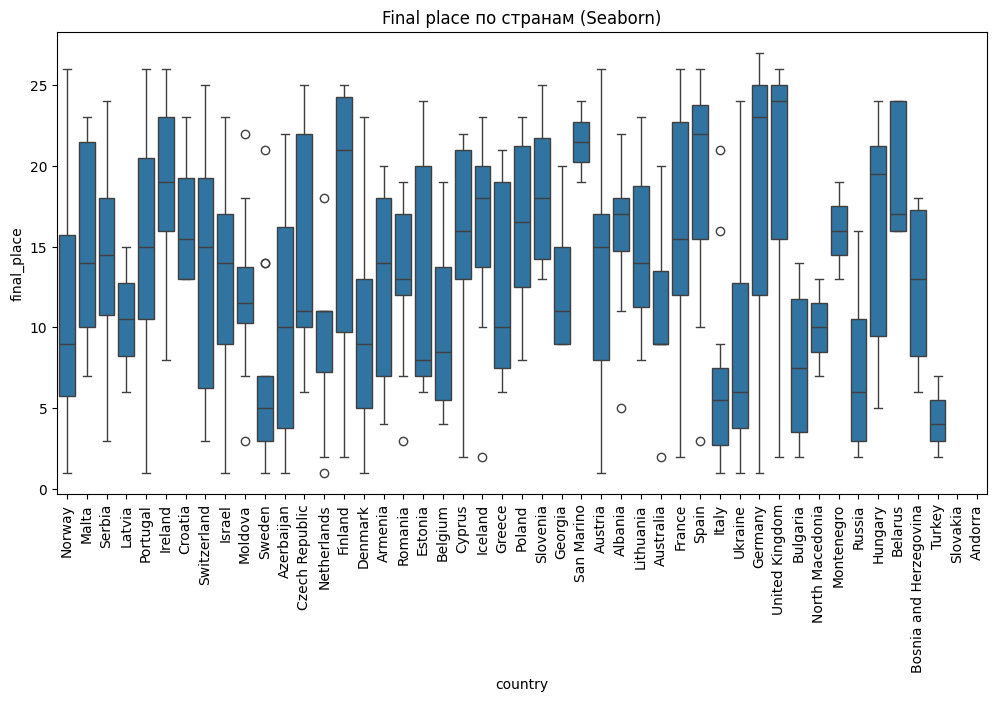

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='country', y='final_place')
plt.xticks(rotation=90)
plt.title("Final place по странам (Seaborn)")
plt.show()

fig = px.box(df, x='country', y='final_place', color='country',
             title='Final place по странам (Plotly)')
fig.show()


## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

In [ ]:
final_counts = df.dropna(subset=['final_place']).groupby('country').size().reset_index(name='final_count')

fig = px.choropleth(final_counts, locations='country', locationmode='country names',
                    color='final_count', color_continuous_scale='Blues',
                    title='Количество раз, когда страна проходила в финал (Plotly)')
fig.show()


## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [ ]:
top3 = df[df['final_place']<=3].groupby('country').size().reset_index(name='top3_count')
fig = px.treemap(top3, path=['country'], values='top3_count',
                 title='Количество попаданий в топ-3 по странам (Treemap Plotly)')
fig.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).